In [1]:
# -*- coding: utf-8 -*-
"""
Time Series Econometrics with Python

Coded by Carlos Góes (andregoes@gmail.com)
Chief-Research Officer, Instituto Mercado Popular

Last updated on March 20th, 2017
"""

# Import all packages

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
# Set the file where your data is located

file = 'https://raw.githubusercontent.com/omercadopopular/cgoes/master/tutorial/Eviews/Output%20gap/outputgap.txt'

# Import it as a table

data = pd.read_table(file, header=0, index_col='date')

In [3]:
# Linearize GDP
data['ly'] = np.log(data['y'])

# Create Growth Rates in GDP and changes in Unemployment

data['dly'] = ( data['ly'] - data['ly'].shift(periods=-1) ) * 100
data['du'] = ( data['u'] - data['u'].shift(periods=-1) ) * 100

                            OLS Regression Results                            
Dep. Variable:                     du   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     14.12
Date:                Mon, 20 Mar 2017   Prob (F-statistic):           0.000769
Time:                        19:25:46   Log-Likelihood:                -43.852
No. Observations:                  31   AIC:                             91.70
Df Residuals:                      29   BIC:                             94.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.5454      0.238     -2.293      0.0

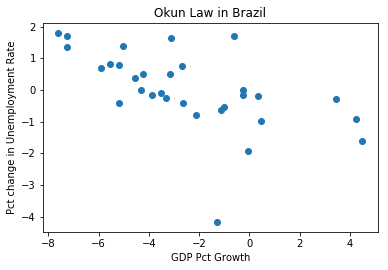

In [4]:
# Trace out the basic relationships

# Run a regression

lm = smf.ols(formula='du ~ dly', data = data).fit()
print(lm.summary())

# Plot a scatterplot

fig = plt.figure()

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.scatter(data['dly'], data['du'])
ax.set_title('Okun Law in Brazil')
ax.set_xlabel('GDP Pct Growth')
ax.set_ylabel('Pct change in Unemployment Rate')
plt.show()

In [5]:
# Calculate, using the HP filter, trend and cycle of GDP

cycle, trend = sm.tsa.filters.hpfilter(data.ly[1980:2011], lamb=1600)
data['ycycle'],data['ytrend'],data['ygap'] = cycle, trend, cycle / trend * 100
    
# Plot Cycle and Trend

fig = plt.figure()
ax = fig.add_subplot(111)
data[['ly','ytrend']][1980:2011].plot(ax=ax, fontsize=16);
ax.set_title('Trend and Cycle of GDP in Brazil')
legend = ax.get_legend()

In [6]:
# Calculate, using the HP filter, trend and cycle of unemployment

cycle, trend = sm.tsa.filters.hpfilter(data.u[1980:2011], lamb=1600)
data['ucycle'],data['utrend'],data['ugap'] = cycle, trend, (cycle - trend) * 100

# Plot Cycle and Trend

fig = plt.figure()
ax = fig.add_subplot(111)
data[['u','utrend']][1980:2011].plot(ax=ax, fontsize=16);
ax.set_title('Natural Rate of Unemployment and Unemployment in Brazil')
legend = ax.get_legend()

                            OLS Regression Results                            
Dep. Variable:                   ugap   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     9.953
Date:                Mon, 20 Mar 2017   Prob (F-statistic):            0.00364
Time:                        19:25:46   Log-Likelihood:                -64.621
No. Observations:                  32   AIC:                             133.2
Df Residuals:                      30   BIC:                             136.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -6.9416      0.333    -20.856      0.0

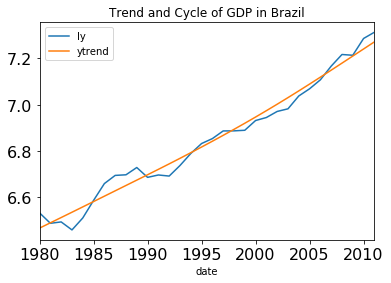

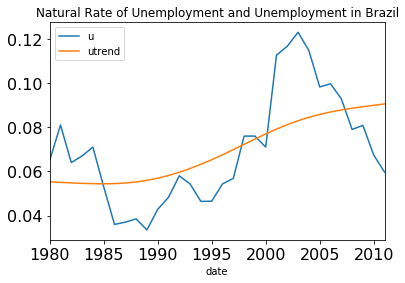

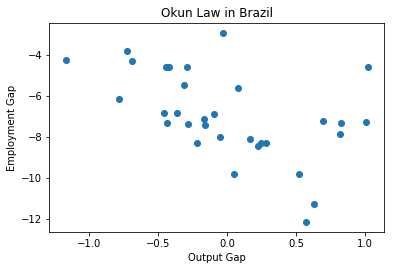

In [7]:
# Run a regression

lm = smf.ols(formula='ugap ~ ygap', data = data).fit()
print(lm.summary())

# Plot a scatterplot

fig = plt.figure()

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.scatter(data['ygap'], data['ugap'])
ax.set_title('Okun Law in Brazil')
ax.set_xlabel('Output Gap')
ax.set_ylabel('Employment Gap')
plt.show()